In [1]:
import numpy as np
import re
import os
import copy
import string
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from collections import defaultdict
import random

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import math 

In [4]:
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# Tokenization

In [5]:
health_corpus=r'.\data\health_corpus.txt'
technical_corpus=r'.\data\technical_corpus.txt'

In [6]:
import string

file=open(technical_corpus,'r',encoding='utf-8')
#file=open(health_corpus,'r',encoding='utf-8')

def isEnglish(s):
    return s.isascii()

def filter_corpus(corpus_lines):
    lines_in_file=[]
    for line in corpus_lines:
        if isEnglish(line) == True:
            lines_in_file.append(line)

    return lines_in_file

lines_read=file.readlines()

lines_in_file=filter_corpus(lines_read)


In [7]:
len(lines_in_file)

14111

In [8]:
tok = 0
for line in lines_in_file:
    tok += len(line.split())

In [9]:
tok

390704

In [10]:
len(lines_read)

14644

In [38]:
# for l in lines_read:
#     if(not isEnglish(l)):
#         print(l)

In [6]:
# lines=['Paragraphs are the building blocks of papers.',
#        'Many students define paragraphs in terms of length: a paragraph is a group of at least five sentences, a paragraph is half a page long, etc.',
#       'In reality, though, the unity and coherence of ideas among sentences is what constitutes a paragraph. ',
#       'A paragraph is defined as “a group of sentences or a single sentence that forms a unit',
#       ' Length and appearance do not determine whether a section in a paper is a paragraph.',
#       'For instance, in some styles of writing, particularly journalistic styles, a paragraph can be just one sentence long.',
#       'Ultimately, a paragraph is a sentence or group of sentences that support one main idea.',
#       ' In this handout, we will refer to this as the “controlling idea,” because it controls what happens in the rest of the paragraph.'
#       ]

In [12]:
train_lines,test_lines,_,_=train_test_split(lines_in_file,[1]*len(lines_in_file),test_size=0.25)

In [13]:
class Tokenizer:
    def __init__(self,use_regex=False,punctuations=[',','?','!',':','-','\'']):
        self.corpus=None
        self.use_regex = use_regex
        self.punctuations=punctuations
        self.re_pattern=re.compile(r'\b\S+\b')
        
        self.tokenized_corpus=[]
    
    
    def custom_tokenizer(self,sentence):      
        for punct in self.punctuations:
            if punct in sentence:
                sentence=sentence.replace(punct,"")
        
        custom_tokens=sentence.split()
        return custom_tokens
        
    def regex_tokenizer(self,sentence):
        tokens_re=re.findall(r'\b\S+\b',sentence)
        return tokens_re
    
    def tokenize(self,corpus):
        self.corpus=corpus
        #print(len(self.corpus))
        
        if self.use_regex == True:
            print('using regex')
            for sentence in self.corpus:
                re_tokens=self.regex_tokenizer(sentence)
                self.tokenized_corpus.append(re_tokens)
                
        else:
            #print('nt')
            sentences=[]
            for sent in self.corpus:
                if sent.endswith("."):
                    sentences.append(sent[:-1])
                else:
                    sentences.append(sent)
            for sentence in self.corpus:
                tokens=self.custom_tokenizer(sentence)
                self.tokenized_corpus.append(tokens)
            
        return self.tokenized_corpus
    
    def sentence_tokenizer(self,sentence):
        sentence_tokens=[]
        if self.use_regex==True:
            sentence_tokens=self.regex_tokenizer(sentence)
        else:
            sentence_tokens=self.custom_tokenizer(sentence)
        return sentence_tokens
    
    def get_sentence_n_grams(self,tokenized_sentences,n_gram,sos='<s>',eos='</s>'):
        sentence_n_grams=list()

        for tokenized_sentence in tokenized_sentences:
            for i in range(0,n_gram-1):
                tokenized_sentence.insert(0,sos)
                tokenized_sentence.append(eos)

            length=len(tokenized_sentence)
            sentence_n_gram=[]

            for n in range(length - (n_gram-1)):
                sentence_n_gram.append(tokenized_sentence[n : n + n_gram])

            sentence_n_grams.extend(sentence_n_gram)

        return sentence_n_grams
    
    
    def get_n_gram_frequency(self,tokenized_list,n_gram,sos='<s>',eos='</s>'):
        frequency=defaultdict(int)
        reverse_freq=defaultdict(lambda: defaultdict(int))
        if n_gram == 1:
            for tokenized_sentence in tokenized_list:
                for token in tokenized_sentence:
                    frequency[token]+=1
        else:
            temp_sentences=copy.deepcopy(tokenized_list)
            sentence_n_grams =  self.get_sentence_n_grams(temp_sentences,n_gram,sos,eos)
            for n_grams in sentence_n_grams:
                    frequency[tuple(n_grams)]+=1
                    
                    key1=tuple(n_grams[:len(n_grams)-1])
                    key2=n_grams[-1]
                    
                    #print((key1,key2))
                    reverse_freq[key1][key2]+=1
                    

        return frequency,reverse_freq
    
    def n_grams_without_tags(self,tokenized_list=[],n_gram=4):
            num_tokens=len(tokenized_list)
            n_gram_tokens=[]
            
            for n in range(num_tokens-(n_gram-1)):
                n_gram_tokens.append(tokenized_list[n : n + n_gram])
            
            return n_gram_tokens

    
    def tokenize_to_n_grams(self,tokenized_list=[],inference=False,n_gram=4,use_tags=True,sos='<s>',eos='</s>'):
    
        if inference==True:
            if(use_tags == True):
                for i in range(0,n_gram-1):
                    tokenized_list.insert(0,sos)
                    tokenized_list.append(eos)
            num_tokens=len(tokenized_list)
            n_gram_tokens=[]
            
            for n in range(num_tokens-(n_gram-1)):
                n_gram_tokens.append(tokenized_list[n : n + n_gram])
            
            return n_gram_tokens
        
        
        n_gram_frequencies=list()
        n_gram_frequencies.append([])
        
        reverse_n_grams=list()
        reverse_n_grams.append([])

        for i in range(n_gram):
            n_gram_frequencies.append(defaultdict(int))
        
        for i in range(n_gram):
            reverse_n_grams.append(defaultdict(lambda: defaultdict(int)))
        
        
        if use_tags == False:
            for i in range(1,n_gram+1):
                reverse_freq=defaultdict(lambda: defaultdict(int))
                
                n_gram_sentences=defaultdict(int)
                
                for tokenized_sentence in tokenized_list:
                    tokenized_n_grams=self.n_grams_without_tags(tokenized_sentence,i)
                    for ngram in tokenized_n_grams:
                        if i == 1:               
                            n_gram_sentences[ngram[0]]+=1
                        else:
                            n_gram_sentences[tuple(ngram)]+=1
                            
                            key1=tuple(ngram[:len(ngram)-1])
                            key2=ngram[-1]
                    
                            #print((key1,key2))
                            reverse_freq[key1][key2]+=1
                            
                n_gram_frequencies[i] = n_gram_sentences
                reverse_n_grams[i]=reverse_freq
        else:
            for i in range(1,n_gram+1):
                freqs,rev_freqs=self.get_n_gram_frequency(tokenized_list,i,sos,eos)
                n_gram_frequencies[i]=freqs
                reverse_n_grams[i]=rev_freqs

        return n_gram_frequencies,reverse_n_grams

In [52]:
# tokenizer_re=Tokenizer(use_regex=True)

# tokens=tokenizer.tokenize(train_lines)


# n_gram_freq,rev_n_gram_freq=tokenizer.tokenize_to_n_grams(tokens,n_gram=4)

In [39]:
tokenizer=Tokenizer(use_regex=False)

tokens=tokenizer.tokenize(train_lines)

# n_gram_freq stores n gram frequencies, rev_n_gram stores
#continuation freq of n-1 grams cached for future use
n_gram_freq,rev_n_gram_freq=tokenizer.tokenize_to_n_grams(tokens,n_gram=4,use_tags=False)

In [15]:
len(tokens)

10583

In [16]:
len(n_gram_freq[1])

8035

In [37]:
n_gram_freq[3]

defaultdict(int,
            {('This', 'is', 'proportional'): 1,
             ('is', 'proportional', 'to'): 20,
             ('proportional', 'to', 'the'): 29,
             ('to', 'the', 'concentration'): 11,
             ('the', 'concentration', 'only'): 1,
             ('concentration', 'only', 'for'): 1,
             ('only', 'for', 'dilute'): 1,
             ('for', 'dilute', 'solution'): 2,
             ('dilute', 'solution', 'where'): 1,
             ('solution', 'where', 'the'): 2,
             ('where', 'the', 'intersolute'): 1,
             ('the', 'intersolute', 'molecule'): 1,
             ('intersolute', 'molecule', 'interaction'): 1,
             ('molecule', 'interaction', 'is'): 1,
             ('interaction', 'is', 'absent'): 1,
             ('is', 'absent', 'basically'): 1,
             ('absent', 'basically', 'then'): 1,
             ('basically', 'then', 'we'): 1,
             ('then', 'we', 'can'): 21,
             ('we', 'can', 'add'): 2,
             ('can', 'add'

In [38]:
rev_n_gram_freq[3]

defaultdict(<function __main__.Tokenizer.tokenize_to_n_grams.<locals>.<lambda>()>,
            {('This', 'is'): defaultdict(int,
                         {'proportional': 1,
                          'having': 1,
                          'derivatised': 1,
                          'a': 20,
                          'you': 1,
                          'the': 41,
                          'primarily': 1,
                          'nothing': 2,
                          'counter': 1,
                          'just': 5,
                          'only': 3,
                          'volume': 1,
                          'sulfanilamide': 1,
                          'based': 2,
                          '93': 1,
                          'one': 5,
                          'very': 4,
                          'present': 1,
                          'surface': 1,
                          'ln': 1,
                          'cis': 1,
                          'your': 4,
                    

In [40]:
len(rev_n_gram_freq[4])

165847

In [41]:
len(n_gram_freq[4])

215979

In [42]:
len(n_gram_freq[4])

215979

In [43]:
len(n_gram_freq[3])

172406

In [44]:
ord_freq=sorted(n_gram_freq[4].items(),key=lambda x : x[1] , reverse=True)

In [46]:
ord_freq[:10]

[(('in', 'the', 'case', 'of'), 228),
 (('at', 'the', 'end', 'of'), 66),
 (('is', 'the', 'number', 'of'), 64),
 (('In', 'the', 'case', 'of'), 63),
 (('the', 'end', 'of', 'the'), 57),
 (('if', 'you', 'have', 'a'), 52),
 (('end', 'to', 'end', 'distance'), 51),
 (('if', 'you', 'want', 'to'), 51),
 (('in', 'the', 'form', 'of'), 46),
 (('we', 'are', 'talking', 'about'), 46)]

In [22]:
def plot(freqs,n,top_k=100):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set()
    
    
    ord_freq=sorted(freqs[n].items(),key=lambda x : x[1] , reverse=True)
    
    plot_fr=[]
    
    for items in ord_freq[:top_k]:
        fr=[]
        fr.append(items[0])
        plot_fr += fr * items[1]
    
    
    plt.figure(figsize = (12, 8))
    plt.xticks(rotation=90)
    plt.title(f'Zipfs Law-Frequency vs.Rank (top {top_k})', fontsize = 16)
    plt.xlabel("rank", fontsize = 16)
    plt.ylabel('frequency',fontsize=16)
    sns.countplot(plot_fr)
    plt.show()

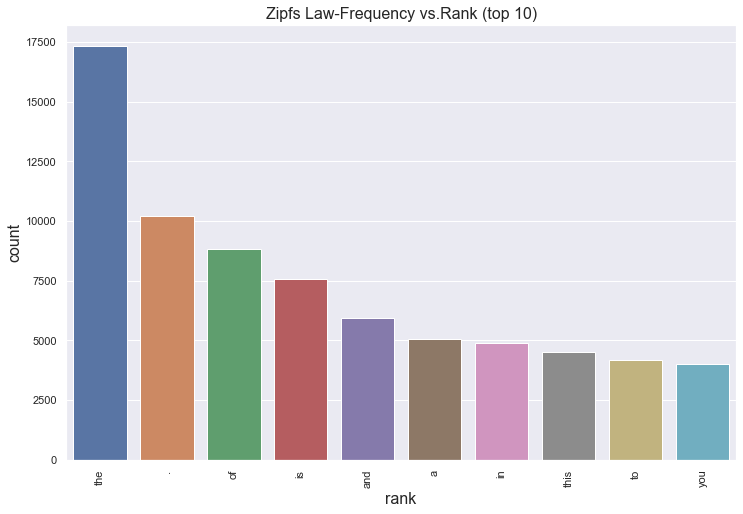

In [23]:
plot(n_gram_freq,1,10)

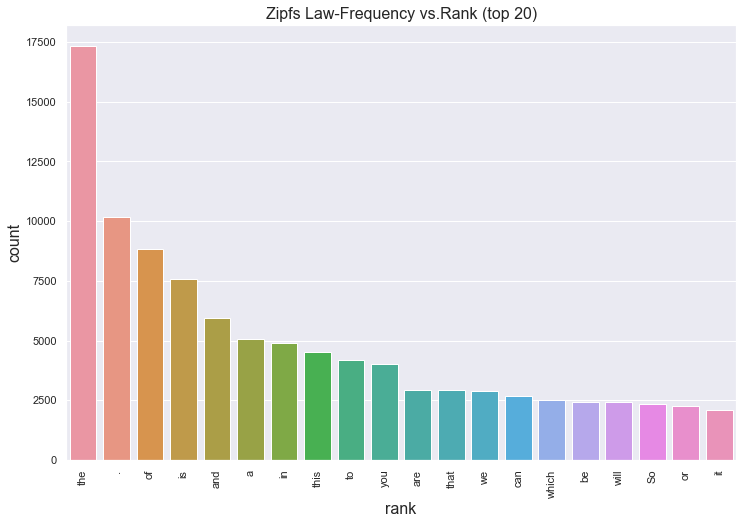

In [24]:
plot(n_gram_freq,1,20)

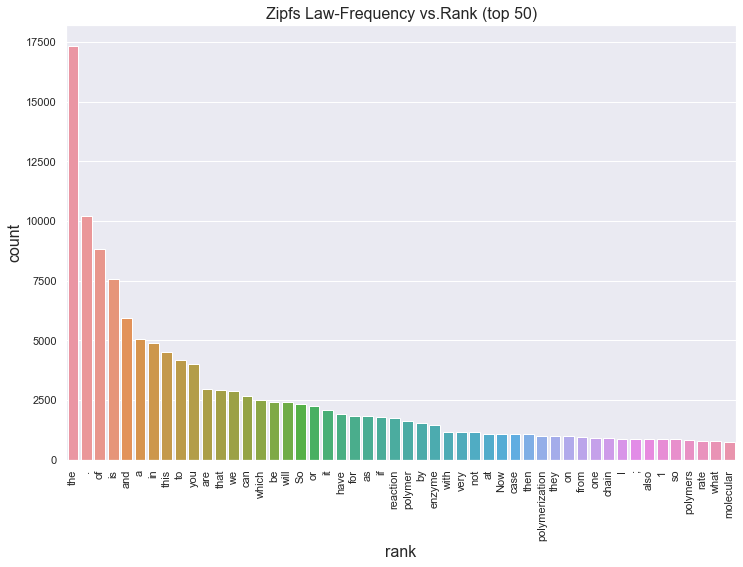

In [25]:
plot(n_gram_freq,1,50)

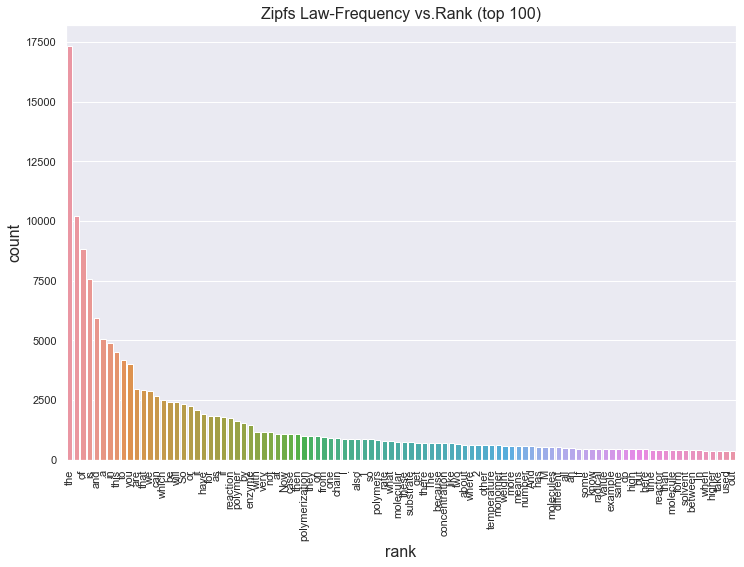

In [26]:
plot(n_gram_freq,1,100)

In [72]:
# sorted(n_gram_freq[1].items(),key=lambda k : k[1],reverse=True)
# sorted(n_gram_freq[2].items(),key=lambda k : k[1],reverse=True)
# sorted(n_gram_freq[3].items(),key=lambda k : k[1],reverse=True)
# sorted(n_gram_freq[4].items(),key=lambda k : k[1],reverse=True)

Perplexity Formula

<img src=".\images\perpleixity_img.jpg" />

Kneser Ney Smoothing Forumla

<img src=".\images\kn.jpg" />

<img src=".\images\kn2.jpg"/>

<img src=".\images\kn3.jpg" />

<img src=".\images\kn4.jpg" />

<img src=".\images\wb_1.jpg" />

<img src=".\images\wb_2.jpg" />

In [48]:
class lm_smoothing:
    def __init__(self,tokenized_list,n_gram_frequencies,reverse_frequencies):
        
        self.number_of_tokens=0
        self.vocab_size=0
        dd=defaultdict(int)
        
        for sentence in tokenized_list:
            for token in sentence:
                dd[token]+=1
                self.number_of_tokens+=1;
                
        self.vocab_size=len(dd)
        self.n_gram_frequencies=n_gram_frequencies
        self.reverse_frequencies = reverse_frequencies
        
        self.one_word_contexts=[]
        for i in range(1,5):
            self.one_word_contexts.append(defaultdict(int))
    
    
        for i in range(2,4):
            for ngrams in self.n_gram_frequencies[i]:
                rhs=ngrams[1:]
                self.one_word_contexts[i][rhs]+=1
        
        
    def P_kneser_ney_base_condn(self,W_i,highest_order,discount):        
        #unigram_case
        if highest_order == True:
            word_freq=self.n_gram_frequencies[1][W_i]
            
            if word_freq == 0:
                return discount*self.vocab_size/self.number_of_tokens
            
            return word_freq*self.vocab_size/self.number_of_tokens
        else:
            #bigram_case
                 
            bigram_occurances=sum([1 for bigrams in self.n_gram_frequencies[2]
                                  if bigrams[1] == W_i])
            
            total_number_of_bigrams = len(self.n_gram_frequencies[2])
            
            if bigram_occurances == 0:
                
                return discount*self.vocab_size/self.number_of_tokens

            return bigram_occurances / total_number_of_bigrams 
                    
                    
    
    def P_kneser_ney(self,W_i,W_prev,highest_order,discount=0.65):
        
        def match_ngrams(seq,match,start,end):
            seq_list=list(seq)
            seq_len=len(seq_list)
            to_match = tuple(seq_list[start: seq_len-end])
           
            if to_match == match :
                return True
            else:
                return False
        
        def is_a_single_token(words):
            if len(words) == 1:
                return True
            else:
                return False
        
        def get_lambda(frequencies,W_prev,N_gram_total):    
            count_preceeding = sum([1 for curr_n_gram in frequencies[N_gram_total]
                                   if frequencies[N_gram_total][curr_n_gram] > 0 and
                                   match_ngrams(curr_n_gram , tuple(W_prev),0,1) == True])

            if count_preceeding == 0:
                count_preceeding=1
            
            return count_preceeding
        
        
        def get_lambda_new(W_prev,N_gram_total):
            
            count_preceeding=len(self.reverse_frequencies[N_gram_total][tuple(W_prev)])
            
            if count_preceeding == 0:
                count_preceeding = 1
            
            return count_preceeding

            
            
        if len(W_prev) == 0 :
            return self.P_kneser_ney_base_condn(W_i,highest_order,discount)
        
        all_words = [x for x in W_prev]
        all_words.append(W_i)
        
        N_gram_total= len(all_words)
        N_gram_prev= len(W_prev)
        n_gram_words=tuple(all_words)
        
        if highest_order == True:
            C_kn_all=0
            if n_gram_words in self.n_gram_frequencies[N_gram_total]:
                C_kn_all= max(self.n_gram_frequencies[N_gram_total][n_gram_words] - discount ,
                      0)
        else:
            C_kn_all=0
            following_words = tuple(all_words[1:])
#             C_kn_all=sum([1 for current_ngram in self.n_gram_frequencies[N_gram_total] 
#                           if(match_ngrams(current_ngram,following_words,1,0) == True)])
#             #print(N_gram_total)
            C_kn_all= self.one_word_contexts[N_gram_total][following_words]

            C_kn_all=max(C_kn_all - discount, 0)

        
        n_gram_prev=tuple(W_prev)
        
        if is_a_single_token(n_gram_prev) == True:
            n_gram_prev=n_gram_prev[0]
            
        if highest_order == True:
            C_kn_prev = 0
            
            if n_gram_prev in self.n_gram_frequencies[N_gram_prev]:
                C_kn_prev = self.n_gram_frequencies[N_gram_prev][n_gram_prev]
            else:
                C_kn_prev= 1 #prevent divide by 0 and allow unseen 
        else:
            C_kn_prev = len(self.n_gram_frequencies[N_gram_total])
        
        lambda_prev2= get_lambda_new(W_prev,N_gram_total)
        
        #print((lambda_prev1,lambda_prev2))
        
        if C_kn_prev == 0 :
            C_kn_prev = 1
            
        #print(f'C_kn_all : {C_kn_all} , C_kn_prev: {C_kn_prev} , lambda :{lambda_prev}')
        
        if C_kn_all > C_kn_prev:
            C_kn_prev = C_kn_all
        
        if lambda_prev2 == 0 :
            return C_kn_all / C_kn_prev
                
        normalized_lambda = lambda_prev2 / C_kn_prev
        
        P_cont = self.P_kneser_ney(W_i,W_prev[1:],highest_order=False,discount=discount)
        
        res= (C_kn_all / C_kn_prev) + (discount * normalized_lambda * P_cont)
        
        #print(f'non-zero lambda C_kn_all : {C_kn_all} , C_kn_prev: {C_kn_prev} , lambda :{lambda_prev2} P_cont : {P_cont} Res: {res}')
        
        return (C_kn_all / C_kn_prev) + (discount * normalized_lambda * P_cont)         
    
    
    
    def P_witten_bell(self,W_i,W_prev):
        def c(W): 
            if len(W) == 1:
                return self.n_gram_frequencies[1][W[0]]
            
            return self.n_gram_frequencies[len(W)][tuple(W)]
        
        def get_N_1_plus(W_prev,N_gram_total):    
            count_preceeding = sum([1 for curr_n_gram in self.n_gram_frequencies[N_gram_total]
                                   if self.n_gram_frequencies[N_gram_total][curr_n_gram] > 0 and
                                   list(curr_n_gram[:len(curr_n_gram)-1]) == W_prev])
            if count_preceeding == 0:
                count_preceeding+=1
            
            return count_preceeding 
        
        
        def get_N_1_plus_new(W_prev,N_gram_total):
            
            count_preceeding=len(self.reverse_frequencies[N_gram_total][tuple(W_prev)])
            
            if count_preceeding == 0:
                count_preceeding = 1
            
            return count_preceeding

        
        
        if len(W_prev) == 0 :
            c_tot= self.n_gram_frequencies[1][W_i[0]]
            tot_gram =  self.number_of_tokens
            
            if c_tot == 0:
                c_tot = 1
            return c_tot / tot_gram
        
        c_total=c(W_prev + W_i)
        
        N_gram_total = len(W_prev + W_i)
    
        n_prev1 = get_N_1_plus_new(W_prev,N_gram_total)
        
        #n_prev2 = get_N_1_plus(W_prev,N_gram_total)
      
        total_n_gram =  sum([val for key,val in self.reverse_frequencies[N_gram_total][tuple(W_prev)].items()])
        

        P_wb_prev = self.P_witten_bell(W_i,W_prev[1:])

        return (c_total + n_prev1 * P_wb_prev )/(total_n_gram + n_prev1)
        
    
    def calculate_perplexity_exp(self,P):
        return (P * np.log(P))/np.log(2)

    
    def perplexity_kneser_ney(self,current_sentence,n_gram,discount=0.7):
        
        kn_tokenizer=Tokenizer()
        tokenized_sentence=kn_tokenizer.sentence_tokenizer(current_sentence)
        #print(tokenized_sentence)
        
        n_gram_tokens=kn_tokenizer.tokenize_to_n_grams(tokenized_sentence,inference=True,n_gram=n_gram)
        
        P_kn=1
        
        perplexity_exp=0
        for n_grams in n_gram_tokens:

            current_word=n_grams[-1]
            previous_words=n_grams[:-1]
            
          
            
            P_kn*=self.P_kneser_ney(current_word,previous_words,highest_order=True,discount=discount)
            
            if P_kn == 0:
                continue
                
            perplexity_exp += self.calculate_perplexity_exp(P_kn)
        
        overall_perplexity = 2 ** (-perplexity_exp)
      
        
        return overall_perplexity,P_kn
    
    def cross_entropy(p, q):
        return -sum([p[i]*math.log2(q[i]) for i in range(len(p))])

    def perplexity_witten_bell(self,current_sentence,n_gram):
        
        wb_tokenizer=Tokenizer()
        tokenized_sentence=wb_tokenizer.sentence_tokenizer(current_sentence)
        
        n_gram_tokens=wb_tokenizer.tokenize_to_n_grams(tokenized_sentence,inference=True,use_tags=True,n_gram=n_gram)
        P_wb=1
        
        perplexity_exp=0
        for n_grams in n_gram_tokens:
            current_word=[]
            cw=n_grams[-1]
            current_word.append(cw)
            previous_words=n_grams[:-1]
            
            
            P_wb *= self.P_witten_bell(current_word,previous_words)
            if P_wb == 0:
                continue
            
            perplexity_exp += self.calculate_perplexity_exp(P_wb)
        
        overall_perplexity = 2 ** (-perplexity_exp)
        
      
        
        return overall_perplexity,P_wb

In [54]:
tokenizer=Tokenizer(use_regex=False)

tokens=tokenizer.tokenize(train_lines)



n_gram_freq,rev_freq=tokenizer.tokenize_to_n_grams(tokens,n_gram=4,use_tags=True)

kns={}
discounts=[0.2,0.3,0.4,0.5,0.6,0.7]
#ngrams=[1,2,3,4]

smoother=lm_smoothing(tokens,n_gram_frequencies=n_gram_freq,reverse_frequencies=rev_freq)
#smoother.perplexity_kneser_ney('csbchasbchas aiudbcnbaibc',4,discount=0.65)
#smoother.perplexity_witten_bell('csbchasbchas aiudbcnbaibc',4)

for disc in discounts:
    kn_prob=[]
    kn_perp=[]
    for sentence in tqdm(test_lines[:50]):
        per,prob=smoother.perplexity_kneser_ney(sentence,4,discount=disc)
        #print(f'prob {prob}')
        #print('-'*50)
        kn_prob.append(prob)
        kn_perp.append(per)
    
    kn_probo = np.array(kn_prob)
    kn_perpo = np.array(kn_perp)
    print(f'disc {disc} nonzero {len(kn_probo[kn_probo > 0])} avgprob {np.mean(kn_probo)} avgperp {np.mean(kn_perpo)} ---- max prob {np.max(kn_probo)}  ---- max perp {np.max(kn_perpo)}')
    kns[disc]=((kn_probo,kn_perpo))


disc 0.2 nonzero 48 avgprob 5.35788216073305e-29 avgperp 1.1984479489826236 ---- max prob 2.6789112615009125e-27  ---- max perp 1.9935573170832435



disc 0.3 nonzero 48 avgprob 4.7806438929216315e-28 avgperp 1.1990562740547814 ---- max prob 2.3902795785338806e-26  ---- max perp 1.9908162793875115



disc 0.4 nonzero 49 avgprob 2.051120849886401e-27 avgperp 1.1994146374302768 ---- max prob 1.0255344599757331e-25  ---- max perp 1.988038342747193



disc 0.5 nonzero 49 avgprob 5.777588296090283e-27 avgperp 1.1993964427719392 ---- max prob 2.8886949417265237e-25  ---- max perp 1.9852242442424166



disc 0.6 nonzero 49 avgprob 1.2156076706747563e-26 avgperp 1.198851014751858 ---- max prob 6.077761156574467e-25  ---- max perp 1.9823745520918812



disc 0.7 nonzero 49 avgprob 2.0113375904287904e-26 avgperp 1.1975976709446237 ---- max prob 1.0056075473761068e-24  ---- max perp 1.9794897519488952


In [55]:
kn_probo

array([8.51150838e-097, 0.00000000e+000, 2.35871254e-126, 7.52420717e-080,
       2.10228788e-162, 1.51766149e-141, 4.95738855e-110, 7.68170681e-038,
       6.82424328e-051, 8.30373075e-153, 6.52996078e-051, 1.72428475e-244,
       3.32808477e-110, 7.10301703e-139, 3.06422728e-040, 1.35702730e-309,
       1.02226716e-070, 6.17512135e-063, 5.27166643e-095, 8.57202061e-071,
       1.96838678e-100, 1.85568736e-111, 4.47393559e-143, 7.83696882e-121,
       3.14505327e-037, 2.50041159e-160, 4.11539044e-118, 1.62610551e-089,
       8.99218480e-164, 2.14131384e-238, 3.15720539e-094, 1.43091983e-081,
       3.73406794e-056, 1.16206280e-165, 1.56213540e-195, 2.07102297e-271,
       1.90732135e-127, 3.31132215e-162, 6.85037790e-092, 4.10639168e-187,
       1.06409804e-066, 1.17668211e-117, 2.59302224e-066, 4.22504976e-029,
       1.00560755e-024, 2.27038366e-080, 1.89973403e-029, 2.75024846e-091,
       6.82118403e-159, 3.00429696e-091])

In [57]:
n_gram_freq,rev_freq=tokenizer.tokenize_to_n_grams(tokens,n_gram=4,use_tags=False)
wb_prob=[]
wb_perp=[]
smoother=lm_smoothing(tokens,n_gram_frequencies=n_gram_freq,reverse_frequencies=rev_freq)

for sentence in tqdm(test_lines):
    per,prob=smoother.perplexity_witten_bell(sentence,4)
    #print(f'{sentence} : {per}:{prob}')
    wb_prob.append(prob)
    wb_perp.append(per)
    
wb_prob=np.array(wb_prob)
wb_perp=np.array(wb_perp)
print(f'nonzero {len(wb_prob[wb_prob > 0])} avgprob {np.mean(wb_prob)} avgperp {np.mean(wb_perp)} ---- max prob {np.max(wb_prob)}  --- max perp {np.max(wb_perp)}')


nonzero 3527 avgprob 8.296889106384154e-25 avgperp 1.017827663538233 ---- max prob 1.7211809255893785e-21  --- max perp 1.125907287444343


In [59]:
n_gram_freq,rev_freq=tokenizer.tokenize_to_n_grams(tokens,n_gram=4,use_tags=False)

wbs={}
discounts=[0.2,0.3,0.4,0.5,0.6,0.7]
ngrams=[2,3,4]

smoother=lm_smoothing(tokens,n_gram_frequencies=n_gram_freq,reverse_frequencies=rev_freq)
for ngrm in ngrams:
    wb_prob=[]
    wb_perp=[]
    for sentence in tqdm(train_lines[:50]):
        per,prob=smoother.perplexity_witten_bell(sentence,ngrm)
        #print(f'prob {prob}')
        #print('-'*50)
        wb_prob.append(prob)
        wb_perp.append(per)
    
    wb_prob = np.array(wb_prob)
    wb_perp = np.array(wb_perp)
    print(f'Ngram {ngrm} nonzero {len(wb_prob[wb_prob > 0])} avgprob {np.mean(wb_prob)} avgperp {np.mean(wb_perp)} ---- max prob {np.max(wb_prob)}  ---- max perp {np.max(wb_perp)}')
    wbs[ngrm]=((wb_prob,wb_perp))


Ngram 2 nonzero 50 avgprob 4.175334160563175e-18 avgperp 1.020361269773561 ---- max prob 1.3164354414388888e-16  ---- max perp 1.046587587823294



Ngram 3 nonzero 50 avgprob 1.515424590708056e-20 avgperp 1.020487710592183 ---- max prob 4.3360034679285436e-19  ---- max perp 1.046756111806328



Ngram 4 nonzero 50 avgprob 7.002299121754602e-25 avgperp 1.0205272259150688 ---- max prob 1.3431345267042767e-23  ---- max perp 1.0469582276222063
